Question 1 (20pts): Basic Video Processing. You can see the tutorials on video processing:
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html


In [1]:
from google.colab import files
upload = files.upload()

Saving bill.avi to bill.avi


In [12]:
%matplotlib inline
import numpy as np
from numpy.fft import fft2, ifft2, fftshift, ifftshift
from numpy import angle, real
from numpy import exp, abs, pi, sqrt
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import imageio

cap = cv2.VideoCapture('bill.avi')


# you can also read ay other viddos. 

# list of video frames
frames = []

while(cap.isOpened()):
    # read frame from the video
    ret, frame = cap.read()
    
    if ret is False:
        break
        
    frames.append(frame)

cap.release()

# scale frame to 0-1
frames = np.array(frames) / 255.
print("frames size:", frames.shape, "# (nb_frames, height, width, channel)")

# get height, width
numFrames = frames.shape[0]
height = frames.shape[1]
width = frames.shape[2]
# print(frames, numFrames, height, width)

frames size: (60, 240, 240, 3) # (nb_frames, height, width, channel)


Question  1a : display space-time slice of the video. Figure 1.1 in the chapter. 

Import a short video, and create a 2D plot where Y axis is $t$ and X-axis is $n$, which is the **horizontal** cross secxtion of the movie. See lecture 11, Slide 22. 
Hint: at each frame, take a vector of pixels at a fixed y-position and show an image of nFrames*nhorizontal pixels as a final image. 

References:
- https://stackoverflow.com/questions/65827830/disabledfunctionerror-cv2-imshow-is-disabled-in-colab-because-it-causes-jupy
- https://stackoverflow.com/questions/28962502/python-2-7-and-opencv-code-gives-cvtcolor-error
- https://docs.opencv.org/master/dd/d43/tutorial_py_video_display.html
- https://stackoverflow.com/questions/61775424/flipped-video-capture-and-display-in-mac-webcam-with-opencv-and-pycharm



240
(60, 240, 3)
<class 'numpy.ndarray'>
(60, 240, 3)


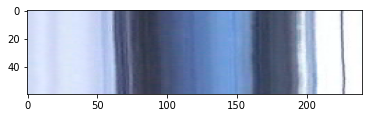

In [36]:
finalFrameLst=[]
for i in range(height):
  tmpList=[]
  for j in range(numFrames):
    tmp_frame=frames[j]
    sliceFrame=np.array([])
    sliceFrame=tmp_frame[i,:,:]
    tmpList.append(sliceFrame)
  finalFrameLst.append(tmpList)
finalFrameLst = np.array(finalFrameLst)
print(len(finalFrameLst))
print(finalFrameLst[0].shape)
print(type(finalFrameLst[0]))
print(finalFrameLst[0].shape)
# cap.release()
plt.imshow(finalFrameLst[25]) # random select the 25th

In [ ]:
"""
import numpy as np
import cv2

cap = cv2.VideoCapture('Yunting.avi')

while (cap.isOpened()):
  ret, frame = cap.read()

  # if frame is successfully read is True
  if not ret:
    print("Can't receive frame (stream end?). Exiting ...")
    break

  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  cv2_imshow(gray)
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
print(type(gray))
"""

Question 1b: Create a space-temporal Gaussian filter. Figure 1.3 in the cvBookTemporal.pdf. See Slide 28. 
Gaussian temporal filtering (applied on a sequence of images) will blur the sequence evolution, smoothing out the temporal variation, like a rapid variation in illumination or movement of an object. It's a gaussian filtering of the signal obtained by the temporal evolution of each single pixel.

SyntaxError: ignored

Question 2: Motion Magnification.

Question 2a.


In [ ]:
def imshow(im, cmap='gray'):
    # clip image from 0-1
    im = np.clip(im, 0, 1)
    plt.imshow(im, cmap=cmap)

In [ ]:
# 9x9 images
imSize = 9

# we would like to magnify the change between im1 and im2 by 4x
magnificationFactor = 4;

# horizontal movement from (0, 0) to (0, 1)
im1 = np.zeros([imSize, imSize])
im2 = np.zeros([imSize, imSize])
im1[0,0] = 1
im2[0,1] = 1

ff1 = fftshift(fft2(im1))
ff2 = fftshift(fft2(im2))

##Magnify Change
Fill out code here

In [ ]:
def magnifyChange(im1, im2, magnificationFactor):
    
    # find phase shift in frequency domain
    im1Dft = fft2(im1)
    im2Dft = fft2(im2)
    phaseShift = # TODO
    
    # magnify the phase change in frequency domain
    magnifiedDft = # TODO
    
    # what does the magnified phase change cause in image space?
    magnified = ifft2(magnifiedDft).real;
    
    return magnified

SyntaxError: ignored

HINT: If you're not familiar with complex number in python, here's a quickstart.

In [ ]:
# create a complex number
x = 1 + 1j
print("x =", x)
print("x.real", x.real, "x.imag", x.imag)

# magnitude and phase of complex number
mag = abs(x)
phase = angle(x)

print("Magnitude", mag)
print("Phase", phase)

# Euler's formula
y = mag * exp(phase * 1j)
print("y =", y)

In [ ]:
# magnify position change
magnified = magnifyChange(im1, im2, magnificationFactor);

plt.figure(figsize=(12,36))
plt.subplot(131)
imshow(im1); plt.title('im1');

plt.subplot(132)
imshow(im2); plt.title('im2');

plt.subplot(133)
imshow(magnified); plt.title('magnified');

##Problem 3.b

In [ ]:
# 9x9 images
imSize = 9

# we would like to magnify the change between im1 and im2 by 4x
magnificationFactor = 4

# horizontal movement from (0, 0) to (0, 1)
# additional vertical movement from (8, 8) to (7, 8)
im1 = np.zeros([imSize, imSize])
im2 = np.zeros([imSize, imSize])
im1[0,0] = 1
im2[0,1] = 1
im1[8,8] = 1
im2[7,8] = 1

# magnify position change
magnified = magnifyChange(im1, im2, magnificationFactor)


plt.figure(figsize=(12,36))
plt.subplot(131)
imshow(im1); plt.title('im1');

plt.subplot(132)
imshow(im2); plt.title('im2');

plt.subplot(133)
imshow(magnified); plt.title('magnified');

##Problem 3.c
Fill out code here

In [ ]:
# 9x9 images
imSize = 9

# we would like to magnify the change between im1 and im2 by 4x
magnificationFactor = 4

# width of our Gaussian window
sigma = 2

# horizontal movement from (0, 0) to (0, 1)
# additional vertical movement from (8, 8) to (7, 8)
im1 = np.zeros([imSize, imSize])
im2 = np.zeros([imSize, imSize])
im1[0,0] = 1
im2[0,1] = 1
im1[8,8] = 1
im2[7,8] = 1

# we will magnify windows of the image and aggregate the results
magnified = np.zeros([imSize, imSize])

# meshgrid for computing Gaussian window
X, Y = np.meshgrid(np.arange(imSize), np.arange(imSize))

for y in range(0, imSize, 2*sigma):
    for x in range(0, imSize, 2*sigma):
        gaussianMask = # TODO
        windowMagnified = magnifyChange(# TODO,\
            magnificationFactor)
        magnified = magnified + windowMagnified
        
plt.figure(figsize=(12,36))
plt.subplot(131)
imshow(im1); plt.title('im1');

plt.subplot(132)
imshow(im2); plt.title('im2');

plt.subplot(133)
imshow(magnified); plt.title('magnified');

##Problem 3.d

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture('bill.avi')

# list of video frames
frames = []

while(cap.isOpened()):
    # read frame from the video
    ret, frame = cap.read()
    
    if ret is False:
        break
        
    frames.append(frame)

cap.release()

# scale frame to 0-1
frames = np.array(frames) / 255.
print("frames size:", frames.shape, "# (nb_frames, height, width, channel)")

# get height, width
numFrames = frames.shape[0]
height = frames.shape[1]
width = frames.shape[2]

##Motion magnification
Fill out code here marked with #TODO

In [ ]:
# 10x magnification of motion
magnificationFactor = 10

# width of Gaussian window
sigma = 13

# alpha for moving average
alpha = 0.5

# we will magnify windows of the video and aggregate the results
magnified = np.zeros_like(frames)

# meshgrid for computing Gaussian window
X, Y = np.meshgrid(np.arange(width), np.arange(height))

# iterate over windows of the frames
xRange = list(range(0, width, 2*sigma))
yRange = list(range(0, height, 2*sigma))
numWindows = len(xRange) * len(yRange)
windowIndex = 1

for y in yRange:
    for x in xRange:
        for channelIndex in range(3): # RGB channels
            for frameIndex in range(numFrames):
                
                # create windowed frames
                gaussianMask = # TODO
                windowedFrames = gaussianMask * frames[frameIndex,:,:,channelIndex]
            
                # initialize moving average of phase for current window/channel
                if frameIndex == 0:
                    windowAveragePhase = angle(fft2(windowedFrames))
                
                windowDft = fft2(windowedFrames)
                
                # compute phase shift and constrain to [-pi, pi] since
                # angle space wraps around
                windowPhaseShift = angle(windowDft) - windowAveragePhase
                windowPhaseShift[windowPhaseShift > pi] = windowPhaseShift[windowPhaseShift > pi] - 2 * pi
                windowPhaseShift[windowPhaseShift < -pi] = windowPhaseShift[windowPhaseShift < -pi] + 2 * pi
                
                # magnify phase shift
                windowMagnifiedPhase = # TODO
                 
                # go back to image space
                windowMagnifiedDft = # TODO
                windowMagnified = abs(ifft2(windowMagnifiedDft))
                
                # update moving average
                windowPhaseUnwrapped = windowAveragePhase + windowPhaseShift
                windowAveragePhase = alpha * windowAveragePhase + (1 - alpha) * windowPhaseUnwrapped
                
                # aggregate
                magnified[frameIndex,:,:,channelIndex] = magnified[frameIndex,:,:,channelIndex] + windowMagnified
        
        # print progress
        print('{}/{}'.format(windowIndex, numWindows), end='\r')
        windowIndex += 1

In [ ]:
outputs = magnified / np.max(magnified)
for channelIndex in range(3):
    originalFrame = frames[0,:,:,channelIndex]
    magnifiedFrame = outputs[0,:,:,channelIndex]
    scale = np.std(originalFrame[:]) / np.std(magnifiedFrame[:])
    originalMean = np.mean(originalFrame[:])
    magnifiedMean = np.mean(magnifiedFrame[:])
    outputs[:,:,:,channelIndex] = magnifiedMean + scale * (outputs[:,:,:,channelIndex] - magnifiedMean)

outputs = np.clip(outputs, 0, 1)

In [ ]:
# create output video
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('bill_magnified.avi',fourcc, 30.0, (height, width))

for i in range(frames.shape[0]):
    # scale the frame back to 0-255
    frame = (np.clip(outputs[i], 0, 1) * 255).astype(np.uint8)
    
    # write frame to output video
    out.write(frame)

out.release()

In [ ]:
# Only for colab downloading videos
try:
    from google.colab import files
    files.download('bill_magnified.avi')
except:
    print("Only for google colab")